In [4]:
# day01
import requests
import json
import base64
import hmac
import hashlib
import datetime
import time


base_url = 'https://api.sandbox.gemini.com'
endpont = '/v1/order/new'
url = base_url + endpont
t = datetime.datetime.now()
payload_nonce = str(int(time.mktime(t.timetuple()) * 1000))
# auditor
gemini_api_key_auditor = 'account-xaqYuJJkpsP5kxYx4Wu9'
gemini_api_secret_auditor = '2Mp4m39f4oWh1tNsLTkWCtH2x8GB'.encode()

# fund
gemini_api_key_fund = 'account-KLllWftEEgzKWNhaZcz9'
gemini_api_secret_fund = 'aBXAnwVN3y4ksEZUN93UaNyUWet'.encode()

# trading
gemini_api_key_trading = 'account-sQYQ1HIJ99gU1AWI4o3a'
gemini_api_secret_trading = '37mopahFB4YXKqmWNpR5EoycjxNA'.encode()

payload = { 
    "request": endpont, 
    "nonce": payload_nonce, 
    "symbol": "btcusd", 
    "amount": "5", 
    "price": "3633.00", 
    "side": "buy", 
    "type":"exchange limit", 
    "options": ["maker-or-cancel"]
}

encoded_payload = json.dumps(payload).encode()
b64 = base64.b64encode(encoded_payload)
signature = hmac.new(gemini_api_secret_trading, b64, hashlib.sha384).hexdigest()

request_headers = {
    'content-Type': 'text/plan',
    'Content-Length': '0', 
    'X-GEMINI-APIKEY': gemini_api_key_trading,   
    'X-GEMINI-PAYLOAD': b64,    
    'X-GEMINI-SIGNATURE': signature,    
    'Cache-Control': 'no-cache'
}

response = requests.post(url, data=None, headers=request_headers)

new_order = response.json()
print(new_order)




{'order_id': '307831759', 'id': '307831759', 'symbol': 'btcusd', 'exchange': 'gemini', 'avg_execution_price': '0.00', 'side': 'buy', 'type': 'exchange limit', 'timestamp': '1571885891', 'timestampms': 1571885891384, 'is_live': True, 'is_cancelled': False, 'is_hidden': False, 'was_forced': False, 'executed_amount': '0', 'remaining_amount': '5', 'options': ['maker-or-cancel'], 'price': '3633.00', 'original_amount': '5'}


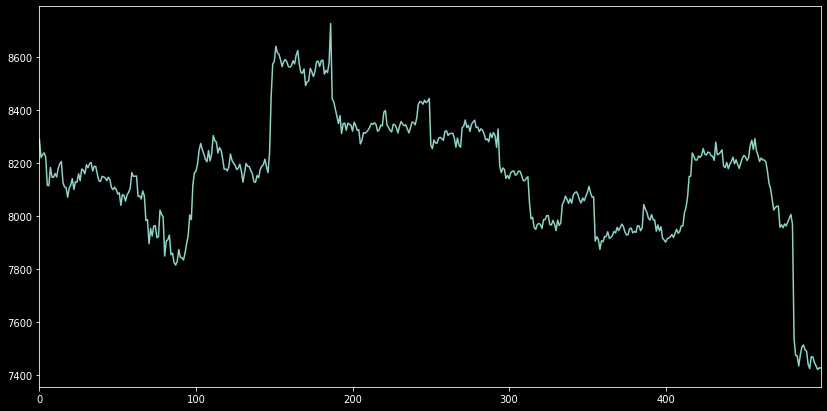

In [5]:
import matplotlib.pyplot as plot
import pandas as pd
import requests

periods = '3600'
url = 'https://api.cryptowat.ch/markets/gemini/btcusd/ohlc'
resp = requests.get(url, params = {
    'periods': periods
})
data = resp.json()
df = pd.DataFrame(
    data['result'][periods],
    columns=[
        'CloseTime',
        'OpenPrice',
        'HighPrice',
        'LowPrice',
        'ClosePrice',
        'Volume',
        'NA'
    ]
)
# print(df.head())
df['ClosePrice'].plot(figsize=(14,7))

In [13]:
import aiohttp
import asyncio

async def http_get(url):
    async with aiohttp.ClientSession(connector=aiohttp.TCPConnector(ssl=False)
    ) as session:
        async with session.get(url) as response:
            return await response.text()

async def main():
    gemini_ticker = 'https://api.gemini.com/v1/pubticker/{}'
    symbol = 'btcusd'
    task = asyncio.create_task(http_get(gemini_ticker.format(symbol)))
    resp = await asyncio.gather(task)
    print(resp)

await main()


In [2]:
import requests
import json

def main():
    gemini_ticker = 'https://api.gemini.com/v1/pubticker/{}'
    symbol = 'btcusd'
    resp = requests.get(gemini_ticker.format(symbol)).json()
    data = json.dumps(resp, indent=4)
    print(data)
    
main()

{
    "bid": "7989.99",
    "ask": "7990.00",
    "volume": {
        "BTC": "894.7851488512",
        "USD": "7253661.606170795959",
        "timestamp": 1571824200000
    },
    "last": "7989.99"
}
